<h1>WorkCamp # Maschinelles Lernen - ## Grundlagen - ###2018</h1>

<h2>Praktische Übung</h2>

<h3>Beispiel xx # Arbeiten mit Sensordaten ## Einlesen und Skalierung von Daten</h3>

Problemstellung:<br>
In diesem Jupyter Notebook , werden Sie in einer Fallstudie die Aufbereitung von Daten durch Skalierung, Normalisierung, Skalenänderung und Binärisierung kennenlernen. Dies ist für einige Algorithmen für Maschinelles Lernen notwendig.
Nach Abschluss dieses Notebooks sollten Sie wissen:
<ul>
<li>Wie man ein Vorhersagemodellierungsproblem auf Basis einer Fragestelluung zur Classiﬁcation durchgehend abarbeitet.
<li>Wie man bisher unbekannte Daten in panda DataFrames lädt: (csv, xlsx, xls, xml, json, hdf5 etc.).
<li>Wie man unbekannte Daten mit einer deskriptiven Statistik in python analysiert.
<li>Wie man unbekannte Daten mit python Bibliotheken visualisiert.
<li>Wie man erzeugte Plots, speichert und dokumentiert.
<li>Wie man Datentransformationen verwendet, um die Performance des Modells zu verbessern, zum Beispiel Normalisierung oder Standardisierung.
<li>Wie man Algorithmus-, oder Hyperparameter-Tuning verwendet, um die Modell-Leistung zu verbessern.
<li>Wie man Ensemble-Methoden verwendet und eine Abstimmung der Parameter zur Verbesserung der Modell-Performance durchführt.
<li>Wie man die Kreuz-Validierung zur Beurteilung der Performance von ML-Algorithmen einsetzt.
<li> Auf welcher Basis eine Beurteilung der verwendetn Classification Algorithmen stattfindet. (Classification Matrix, Confusion Matrix)
</ul>
Die Module und Bibliotheken stehen alle in der <b>Anaconda scikit-learn</b> Umgebung zum Maschinellen Lernen direkt zur Verfügung.<br>
<b>Arbeiten mit Zeitreihen:</b><br>
Insbesondere beim arbeiten mit Zeitreihen (timeseries) wird, falls notwendig, statsmodels und dessen Klassen, Bibliotheken und Module nachgeladen.<br>
<b>Tipp:</b><br>
<b>Falls in Ihrer Version statsmodels nicht vorhanden ist, mit: !pip install statsmodels in einer Jupyter Zelle
nachinstallieren.</b><br>
Informationen zu statsmodels finden Sie hier: http://www.statsmodels.org/<br>

########Eventuell Strukturbild einbauen ########

########Evtl. nochmals Vorgehen als Ablaufmodell#########

In [1]:
# Laden der entsprechenden Module (kann etwas dauern !)
# Wir laden die Module offen, damit man einmal sieht, was da alles benötigt wird
# Allerdings aufpassen, dann werden die Module anderst angesprochen wie beim Standard
# zum Beispiel pyplot und nicht plt
from matplotlib import pyplot
pyplot.rcParams["figure.figsize"] = (15,12)
%matplotlib inline
import numpy as np #wird allerdings nicht benötigt
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

Problem Beschreibung:<br>
Der Fokus dieses Projektes liegt auf dem Datensatz "sensordaten-10.csv". Das Problem ist die Vorhersage von guten und schlechten Werkstücken aus den 10 Sensordaten. Jedes Muster ist ein Satz von 10 Zahlen. Die Sensoren decken unterschiedliche Wertebereiche ab.Das Label, das jeder Datenreihe zugeordnet ist, enthält 0 oder 1. Wenn das Werkstück die Beurteilung gut hat steht eine 1 in der Spalte Label, sonst eine 0.<br>
<b>Aufgabe:</b><br>
Laden Sie die Daten und verschaffen Sie sich einen ersten Überblick<br>


In [2]:
#Laden der Daten [12100 Datensätze mit 10 Sensoren und einer Spalte Label (12100x11)Matrix]
url = 'sensordaten-10.csv'
datensatz = read_csv(url, sep=';', header=0)

<h3>Beschreibende Statistik</h3>

In [3]:
# Ausgabe df.shape
print(datensatz.shape)

(12100, 11)


In [4]:
# Ausgabe df.dtypes
# Spalte enthält die Classifikation R oder M
set_option('display.max_rows', 50)
print(datensatz.dtypes)

Sens-1     float64
Sens-2     float64
Sens-3     float64
Sens-4     float64
Sens-5     float64
Sens-6     float64
Sens-7     float64
Sens-8     float64
Sens-9     float64
Sens-10    float64
Label        int64
dtype: object


In [5]:
# Ausgabe df.head mit vergösserter display width
set_option('display.width', 100)
print(datensatz.head(20))

    Sens-1  Sens-2  Sens-3  Sens-4  Sens-5  Sens-6  Sens-7  Sens-8  Sens-9  Sens-10  Label
0    15.31   25.31   75.31  109.23   63.07    0.65  159.60   23.69   41.53    59.21      1
1    16.76   26.76   76.76  115.05   77.62    1.38  181.44   47.48   77.22   118.70      1
2    18.62   28.62   78.62  122.48   96.20    2.31  209.29   46.78   76.16   116.94      1
3    18.52   28.52   78.52  122.08   95.21    2.26  207.82   41.68   68.52   104.20      1
4    18.93   28.93   78.93  123.74   99.34    2.47  214.01   34.61   57.92    86.54      1
5    17.28   27.28   77.28  117.12   82.81    1.64  189.21   46.71   76.07   116.78      1
6    18.09   28.09   78.09  120.35   90.88    2.04  201.31   42.68   70.02   106.71      1
7    19.00   29.00   79.00  124.00  100.00    2.50  215.00   31.19   52.78    77.96      1
8    17.78   27.78   77.78  119.11   87.79    1.89  196.68   43.80   71.71   109.51      0
9    17.83   27.83   77.83  119.31   88.27    1.91  197.40   47.71   77.57   119.28      1

In [6]:
# Ausgabe df.describe() mit 4 Nachkomma Stellen
set_option('precision', 4)
print(datensatz.describe())

           Sens-1      Sens-2      Sens-3      Sens-4      Sens-5      Sens-6      Sens-7  \
count  12100.0000  12100.0000  12100.0000  12100.0000  12100.0000  12100.0000  12100.0000   
mean      18.0005     28.0005     78.0005    120.0021     90.0052      2.0006    200.0078   
std        1.0067      1.0067      1.0067      4.0267     10.0667      0.5028     15.1000   
min       13.9900     23.9900     73.9900    103.9600     49.9100      0.1300    139.8600   
25%       17.3100     27.3100     77.3100    117.2400     83.1100      1.6600    189.6600   
50%       18.0000     28.0000     78.0000    119.9900     89.9800      2.0000    199.9650   
75%       18.6700     28.6700     78.6700    122.6800     96.7100      2.3400    210.0600   
max       21.7400     31.7400     81.7400    134.9700    127.4200      3.8700    256.1200   

           Sens-8      Sens-9     Sens-10       Label  
count  12100.0000  12100.0000  12100.0000  12100.0000  
mean      44.0383     72.0574    110.0942      0.9

In [7]:
# Ausgabe der Klassen Verteilung in der Spalte 60
print(datensatz.groupby('Label').size())


Label
0      932
1    11168
dtype: int64


<h3>Visualisierung der Daten</h3>

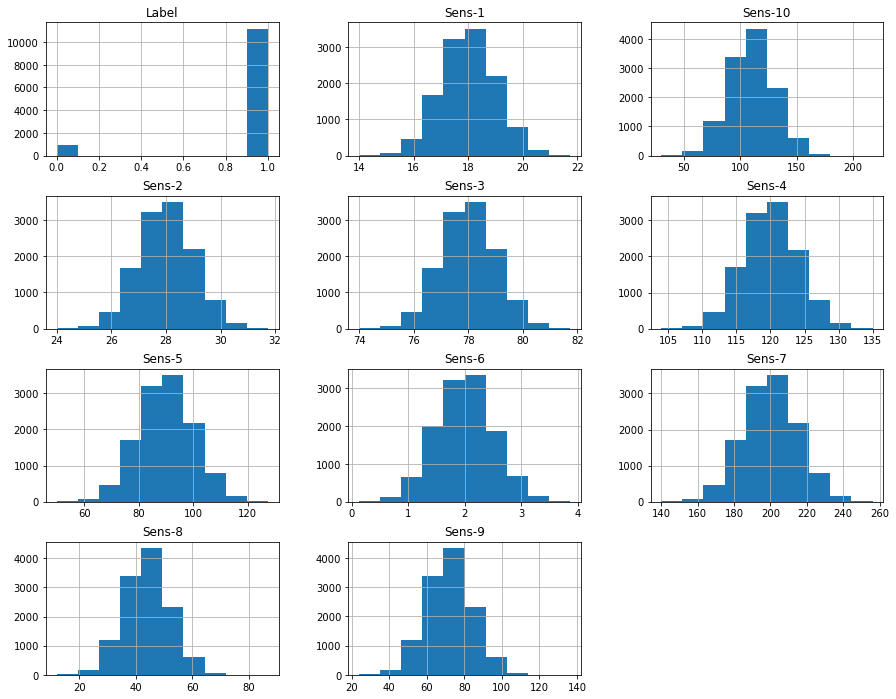

In [8]:
# Ausgabe Histogramm
pyplot.rcParams["figure.figsize"] = (15,12)
datensatz.hist()
pyplot.show()

<h3>Standardisierung der Daten</h3>

Standardisierung ist eine nützliche Technik, um Attribute mit einer beliebigen Gauss-Normalverteilung N( , ) in eine Standard-Gaußsche Verteilung N(0,1) mit einem Mittelwert von 0 und einer Standardabweichung von 1 zu transformieren. Die Standardisierung ist am besten geeignet für Algorithmen, die eine Gaußsche Verteilung in den Eingangsvariablen annehmen und besser mit skalierten Daten arbeiten, wie z.B. Lineare Regression, Logistische Regression und Lineare Diskriminanzanalyse. Wir können Daten mit scikit-learn mit der StandardScaler-Klasse standardisieren.

In [27]:
# Standardisierung der Daten (Mittelwert = 0 , Standardabweichung = 1)
# mit from sklearn.preprocessing import StandardScaler wurde die Klasse in Zelle 1 bereits geladen
#Laden des Moduls set_printoptions
from numpy import set_printoptions
# Übergabe der Werte in datensatz an ein array
array = datensatz.values
# Aufteilen des arrays in abhängige Variable Y und unabhängige Variable X
X = array[:,0:10]
Y = array[:,10]
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)
# Ausgabe einer Kurzfassung der Daten 0:10
set_printoptions(precision=3)
print(rescaledX[0:10,:])

[[-2.673 -2.673 -2.673 -2.675 -2.676 -2.686 -2.676 -2.545 -2.546 -2.546]
 [-1.232 -1.232 -1.232 -1.23  -1.23  -1.234 -1.23   0.431  0.431  0.431]
 [ 0.615  0.615  0.615  0.615  0.615  0.615  0.615  0.343  0.342  0.343]
 [ 0.516  0.516  0.516  0.516  0.517  0.516  0.517 -0.295 -0.295 -0.295]
 [ 0.923  0.923  0.923  0.928  0.927  0.934  0.927 -1.179 -1.179 -1.179]
 [-0.716 -0.716 -0.716 -0.716 -0.715 -0.717 -0.715  0.334  0.335  0.335]
 [ 0.089  0.089  0.089  0.086  0.087  0.078  0.086 -0.17  -0.17  -0.169]
 [ 0.993  0.993  0.993  0.993  0.993  0.993  0.993 -1.607 -1.608 -1.608]
 [-0.219 -0.219 -0.219 -0.222 -0.22  -0.22  -0.22  -0.03  -0.029 -0.029]
 [-0.169 -0.169 -0.169 -0.172 -0.172 -0.18  -0.173  0.459  0.46   0.46 ]]


<h3>Normalisierung der Daten</h3>

Die Normalisierung in scikit-learn bezieht sich auf die Skalierung jeder Beobachtung (Zeile) auf eine Länge von 1 (eine Einheitsnorm oder ein Vektor mit der Länge von 1 in der linearen Algebra). Diese Vorverarbeitungsmethode kann für spärliche Datensätze (viele Nullen) mit Attributen unterschiedlicher Größenordnung nützlich sein, wenn Algorithmen verwendet werden, die Eingabewerte gewichten, wie Neuronale Netze und Algorithmen mit Entfernungsmessungen wie k-Nearest Neighbors. Wir können Daten in Python in scikit-learn mit der Normalizer class normalisieren.

In [29]:
# Normalisierung der Daten (Vektorlänge 1)
# Laden des Moduls Normalizer
from sklearn.preprocessing import Normalizer
#Übergabe der Werte in datensatz an ein array2
array2 = datensatz.values
# Aufteilen des arrays in abhängige Variable Y und unabhängige Variable X
X = array2[:,0:10]
Y = array2[:,10]
scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)
# Ausgabe einer Kurzfassung der Daten 0:10
set_printoptions(precision=3)
print(normalizedX[0:10,:])

[[ 0.066  0.109  0.325  0.471  0.272  0.003  0.689  0.102  0.179  0.255]
 [ 0.059  0.094  0.269  0.403  0.272  0.005  0.636  0.166  0.271  0.416]
 [ 0.06   0.092  0.252  0.393  0.309  0.007  0.672  0.15   0.244  0.375]
 [ 0.061  0.094  0.259  0.403  0.314  0.007  0.686  0.138  0.226  0.344]
 [ 0.063  0.096  0.262  0.411  0.33   0.008  0.712  0.115  0.193  0.288]
 [ 0.059  0.094  0.265  0.402  0.284  0.006  0.649  0.16   0.261  0.401]
 [ 0.061  0.094  0.262  0.404  0.305  0.007  0.676  0.143  0.235  0.359]
 [ 0.064  0.097  0.265  0.416  0.335  0.008  0.721  0.105  0.177  0.261]
 [ 0.06   0.094  0.264  0.404  0.298  0.006  0.668  0.149  0.243  0.372]
 [ 0.059  0.092  0.258  0.396  0.293  0.006  0.656  0.158  0.258  0.396]]


<h3>Binärisierung der Daten</h3>

Wir können die Daten mit einer binären Schwelle (threshold) transformieren. Alle Werte oberhalb der Schwelle werden mit 1 und alle gleich oder kleiner mit 0 gekennzeichnet. Dies wird als Binärisierung der Daten. Es kann nützlich sein, wenn wir scharfe Trennungen haben wollen. Es ist auch im Feature Engineering nützlich, wenn neue Festures mit großer Bedeutung hinzugefügt werden sollen. Wir können neue binäre Attribute in Python in scikit-learn mit der Binarizer class erstellen.


In [30]:
# Binärisierung der Daten 
# Laden des Moduls Binarizer aus sklearn.preprocessing
from sklearn.preprocessing import Binarizer
# Übergabe der Werte in datensatz an ein array3
array3 = datensatz.values
# Aufteilen des arrays in abhängige Variable Y und unabhängige Variable X
X = array3[:,0:10]
Y = array3[:,10]
# Einstellen des threshold() für den Binarizer. Wir wählen 50
binarizer = Binarizer(threshold=50.0).fit(X)
binaryX = binarizer.transform(X)
# Ausgabe einer Kurzfassung der Daten 0:10
set_printoptions(precision=3)
print(binaryX[0:10,:])

[[ 0.  0.  1.  1.  1.  0.  1.  0.  0.  1.]
 [ 0.  0.  1.  1.  1.  0.  1.  0.  1.  1.]
 [ 0.  0.  1.  1.  1.  0.  1.  0.  1.  1.]
 [ 0.  0.  1.  1.  1.  0.  1.  0.  1.  1.]
 [ 0.  0.  1.  1.  1.  0.  1.  0.  1.  1.]
 [ 0.  0.  1.  1.  1.  0.  1.  0.  1.  1.]
 [ 0.  0.  1.  1.  1.  0.  1.  0.  1.  1.]
 [ 0.  0.  1.  1.  1.  0.  1.  0.  1.  1.]
 [ 0.  0.  1.  1.  1.  0.  1.  0.  1.  1.]
 [ 0.  0.  1.  1.  1.  0.  1.  0.  1.  1.]]


<h3>Skalierung der Daten</h3>

Wenn die Daten aus Attributen mit unterschiedlichen Größenordnungen bestehen, soe wie hier im Datensatz der Sensordaten, können sich viele Algorithmen des maschinellen Lernens durch die Neuskalierung der Attribute im Ergebnis verbessern. Oft wird dies als Normalisierung bezeichnet. Die Attribute werden dann in den Bereich zwischen 0 und 1 skaliert. Dies ist nützlich zum Beispiel für Optimierungsalgorithmen, die im Kern von maschinellen Lernalgorithmen wie dem Gradientenabstieg (gradient descent) verwendet werden. Dies ist auch nützlich bei Algorithmen, wie Regression und Neuronale Netze, die Eingaben gewichten und Algorithmen, die Entfernungsmessungen verwenden, wie zum Beipiel k-Nearest Neighbors. Wir können die Daten in scikit-learn mit der MinMaxScaler-Klasse neu skalieren.

In [32]:
# Skalierung der Daten 
# Laden des Moduls MinMaxScaler aus sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler
# Übergabe der Werte in datensatz an ein array4
array4 = datensatz.values
# Aufteilen des arrays in abhängige Variable Y und unabhängige Variable X
X = array4[:,0:10]
Y = array4[:,10]
# Einstellen der feature_range() im MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)
# Ausgabe einer Kurzfassung der Daten 0:10 mit precision=2
set_printoptions(precision=2)
print(rescaledX[0:10,:])

[[ 0.17  0.17  0.17  0.17  0.17  0.14  0.17  0.16  0.16  0.16]
 [ 0.36  0.36  0.36  0.36  0.36  0.33  0.36  0.47  0.47  0.47]
 [ 0.6   0.6   0.6   0.6   0.6   0.58  0.6   0.46  0.46  0.46]
 [ 0.58  0.58  0.58  0.58  0.58  0.57  0.58  0.4   0.4   0.4 ]
 [ 0.64  0.64  0.64  0.64  0.64  0.63  0.64  0.3   0.3   0.3 ]
 [ 0.42  0.42  0.42  0.42  0.42  0.4   0.42  0.46  0.46  0.46]
 [ 0.53  0.53  0.53  0.53  0.53  0.51  0.53  0.41  0.41  0.41]
 [ 0.65  0.65  0.65  0.65  0.65  0.63  0.65  0.26  0.26  0.26]
 [ 0.49  0.49  0.49  0.49  0.49  0.47  0.49  0.42  0.43  0.43]
 [ 0.5   0.5   0.5   0.5   0.49  0.48  0.49  0.48  0.48  0.48]]


<h3>Weiteres Beispiel</h3>

In [34]:
# Standardisierung der Daten (Mittelwert = 0 , Standardabweichung = 1)
from sklearn.preprocessing import StandardScaler
from pandas import read_csv
from numpy import set_printoptions
# Übergabe des Dateinamens an die Variable Dateiname
dateiname = 'pima-indians-diabetes.data.csv'
# Festlegen der Spalten Namen für den DataFrame
namen = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
# Einlesen der Daten in einen panda DataFrame mit read_csv()
df = read_csv(dateiname, names=namen)
# Übergabe der Werte in df an ein array5
array5 = df.values
# Aufteilen des arrays in abhängige Variable Y und unabhängige Variable X - hier steht die Klasse in Spalte 9
X = array5[:,0:8]
Y = array5[:,8]
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)
# summarize transformed data
set_printoptions(precision=3)
print(rescaledX[0:10,:])

[[ 0.64   0.848  0.15   0.907 -0.693  0.204  0.468  1.426]
 [-0.845 -1.123 -0.161  0.531 -0.693 -0.684 -0.365 -0.191]
 [ 1.234  1.944 -0.264 -1.288 -0.693 -1.103  0.604 -0.106]
 [-0.845 -0.998 -0.161  0.155  0.123 -0.494 -0.921 -1.042]
 [-1.142  0.504 -1.505  0.907  0.766  1.41   5.485 -0.02 ]
 [ 0.343 -0.153  0.253 -1.288 -0.693 -0.811 -0.818 -0.276]
 [-0.251 -1.342 -0.988  0.719  0.071 -0.126 -0.676 -0.616]
 [ 1.828 -0.184 -3.573 -1.288 -0.693  0.42  -1.02  -0.361]
 [-0.548  2.382  0.046  1.535  4.022 -0.189 -0.948  1.681]
 [ 1.234  0.128  1.39  -1.288 -0.693 -4.06  -0.724  1.766]]


<h2>Weiterführende Links:</h2>

<ul>
<li> https://www.stuttgart.ihk.de
</ul>

<h2>Weiterführende Literatur:</h2>

<ul>
<li> https://www.stuttgart.ihk.de
</ul>

<b>Ansprechpartner IHK-Region Stuttgart:</b><br>
Dipl. Wirtsch-Ing. R. Rank